# Bibliometric Analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime
import pandas as pd
import os

In [4]:
# moving up a directory to access project folder
os.chdir('..')

In [ ]:
# loading data
df = pd.read_csv('data/raw/biblio.csv')

## Publications
Publication for bilbiometric analysis

In [10]:
# adjusting names
df = df.rename(columns={"Item Type": "Publication Type"})
df['Manual Tags'] = df['Manual Tags'].apply(lambda x: [tag.strip() for tag in x.split(';')] if isinstance(x, str) else [])
df['Publication Type'] = df['Publication Type'].replace('bookSection', 'Book Section').replace('conferencePaper', 'Conference Paper').replace('journalArticle', 'Journal Article')

In [11]:
biblio_df= df[["Publication Type","Publication Year","Author","Title","Publication Title","Conference Name","Manual Tags"]]

In [12]:
year_item_counts = df.groupby(['Publication Year', 'Publication Type']).size().unstack(fill_value=0)
year_item_counts_adjusted = year_item_counts.copy()
if 2024 in year_item_counts_adjusted.index:
    year_item_counts_adjusted.loc[2024] = np.round(year_item_counts_adjusted.loc[2024] * 365/334) #1-DEC

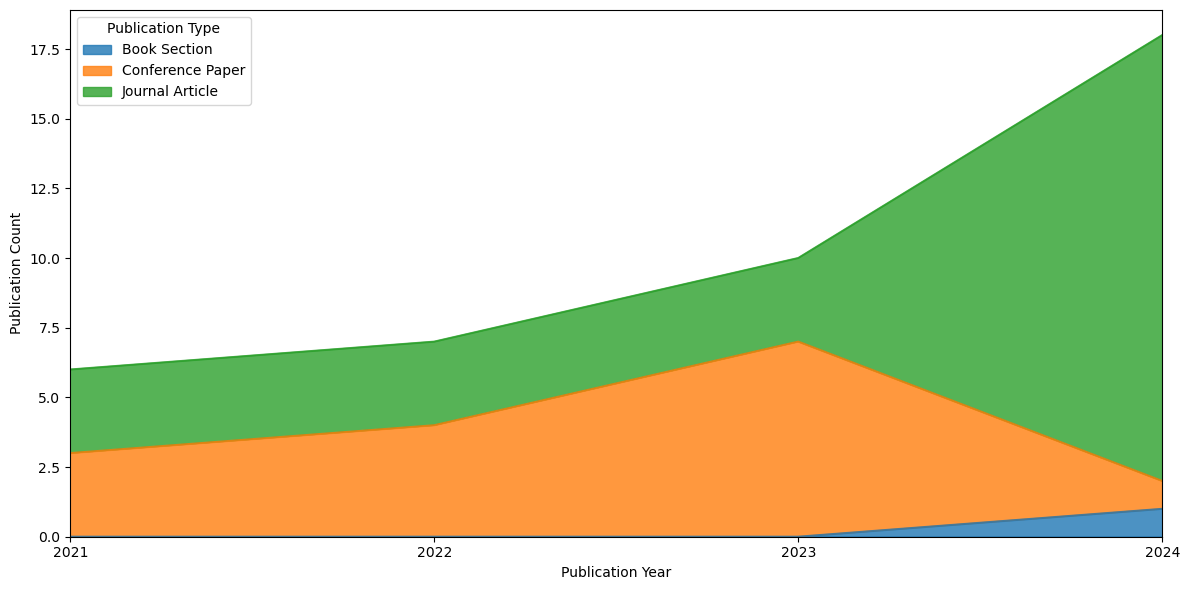

In [13]:
year_item_counts_adjusted.plot(kind='area', stacked=True, alpha=0.8, figsize=(12, 6))
plt.xlabel('Publication Year')
plt.ylabel('Publication Count')
plt.xlim(2021, 2024)
plt.xticks(range(2021, 2025,1))
plt.legend(title='Publication Type')
plt.tight_layout()
plt.show();

## Manual Tag Analysis
The previous cells are similar to notebook provided. The following is to utilize manual tags that were added

* **Detrimental content** - content being identified
  
controversy, cyberbullying, fake_news, fake_reviews, hate, misinformation, misogyny, rumours, sexism, suspension, toxic, troll

* **ML Method** - machine learning method used
  
BERT, BERT_w_CNN, CNN, EfficientNETB0, EKI-SM, ELECTRA, FAST-RNN, GNN, gradient_boosting, LGBMRegressor, mBERT, Naive_Bayes_random_forest, XGBoost, XLnet, LSTM, SVM

* **XAI** - Explainable AI Local Model-Agnostic Methods used
  
anchor, counterfactual, LIME, SHAP, LIME_w_integrated_gradients

In [14]:

# Define categories and their keywords
detrimental_content = [
    "controversy", "cyberbullying", "fake_news", "fake_reviews", "hate", "misinformation",
    "misogyny", "rumours", "sexism", "suspension", "toxic", "troll"
]

ml_methods = [
    "BERT", "BERT_w_CNN", "CNN", "EfficientNETB0", "EKI-SM", "ELECTRA", "FAST-RNN", "GNN",
    "gradient_boosting", "LGBMRegressor", "mBERT", "Naive_Bayes", "random_forest", "XGBoost", "XLnet", "LSTM", "SVM", "Linear_SVC"
]

xai_methods = [
    "anchor", "counterfactual", "LIME", "SHAP", "LIME_w_integrated_gradients"
]


In [15]:
type(biblio_df['Manual Tags'][0])

list

In [16]:
biblio_df['Manual Tags'][0]

['Deep learning',
 'Learning algorithms',
 'Natural language processing systems',
 'BERT',
 'Bidirectional encoder representation from transformer',
 'Condition',
 'COVID-19',
 'Distilbert',
 'DistilBERT',
 'Misinformation detection',
 'Natural languages',
 'Performance',
 'SHAP',
 'Shapley',
 'Shapley additive explanation',
 'Trust',
 'manual_BERT',
 'manual_SHAP',
 'manual_misinformation']

In [17]:
def remove_manual_prefix(tag):
    if tag.startswith("manual_"):
        return tag[7:]  # Remove "manual_" from the beginning
    return None  # Exclude tags that don't start with "manual_"

# Create a new column with processed tags
biblio_df['Tags'] = biblio_df['Manual Tags'].apply(
    lambda tags: [remove_manual_prefix(tag) for tag in tags if remove_manual_prefix(tag) is not None]
)

/tmp/ipykernel_56638/1686250814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biblio_df['Tags'] = biblio_df['Manual Tags'].apply(


In [18]:
biblio_df['Tags'].head()

0    [BERT, SHAP, misinformation]
1             [LSTM, LIME, troll]
2         [LSTM, LIME, fake_news]
3              [BERT, LIME, hate]
4           [SHAP, XGBoost, hate]
Name: Tags, dtype: object

In [19]:

# Function to classify tags
def classify_tags(tags, category):
    return [tag for tag in tags if tag in category]

# Apply classification to create new columns
biblio_df["Detrimental Content"] = biblio_df["Tags"].apply(lambda x: classify_tags(x, detrimental_content))
biblio_df["ML Method"] = biblio_df["Tags"].apply(lambda x: classify_tags(x, ml_methods))
biblio_df["XAI"] = biblio_df["Tags"].apply(lambda x: classify_tags(x, xai_methods))


/tmp/ipykernel_56638/3064589099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biblio_df["Detrimental Content"] = biblio_df["Tags"].apply(lambda x: classify_tags(x, detrimental_content))
/tmp/ipykernel_56638/3064589099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biblio_df["ML Method"] = biblio_df["Tags"].apply(lambda x: classify_tags(x, ml_methods))
/tmp/ipykernel_56638/3064589099.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [20]:
biblio_df.dtypes

Publication Type       object
Publication Year        int64
Author                 object
Title                  object
Publication Title      object
Conference Name        object
Manual Tags            object
Tags                   object
Detrimental Content    object
ML Method              object
XAI                    object
dtype: object

In [21]:
biblio_df.head()

,Publication Type,Publication Year,Author,Title,Publication Title,Conference Name,Manual Tags,Tags,Detrimental Content,ML Method,XAI
0,Journal Article,2021,"Ayoub, J.; Yang, X.J.; Zhou, F.",Combat COVID-19 infodemic using explainable na...,Information Processing and Management,NaN,"[Deep learning, Learning algorithms, Natural l...","[BERT, SHAP, misinformation]",[misinformation],[BERT],[SHAP]
1,Conference Paper,2021,"Tafannum, F.; Sharear Shopnil, M.N.; Salsabil,...",Demystifying Black-box Learning Models of Rumo...,"IEEE Annu. Ubiquitous Comput., Electron. Mob. ...","2021 IEEE 12th Annual Ubiquitous Computing, El...","[Social media, Machine-learning, Deep learning...","[LSTM, LIME, troll]",[troll],[LSTM],[LIME]
2,Journal Article,2022,"Ahmed, M.; Hossain, M.S.; Ul Islam, R.; Anders...",Explainable Text Classification Model for COVI...,Journal of Internet Services and Information S...,NaN,"[Explainable AI, fake news, LIME, COVID-19, Bi...","[LSTM, LIME, fake_news]",[fake_news],[LSTM],[LIME]
3,Conference Paper,2022,"Nandini, D.; Schmid, U.",Explaining Hate Speech Classification with Mod...,CEUR Workshop Proc.,CEUR Workshop Proceedings,"[Interpretable artificial intelligence, Learni...","[BERT, LIME, hate]",[hate],[BERT],[LIME]
4,Conference Paper,2022,"Babaeianjelodar, M.; Poorna Prudhvi, G.; Loren...",Interpretable and High-Performance Hate and Of...,Lect. Notes Comput. Sci.,Lecture Notes in Computer Science (including s...,"[Transparency, Machine-learning, Social media ...","[SHAP, XGBoost, hate]",[hate],[XGBoost],[SHAP]


## XAI Methods Distribution by Publication Year

<Figure size 1200x600 with 0 Axes>

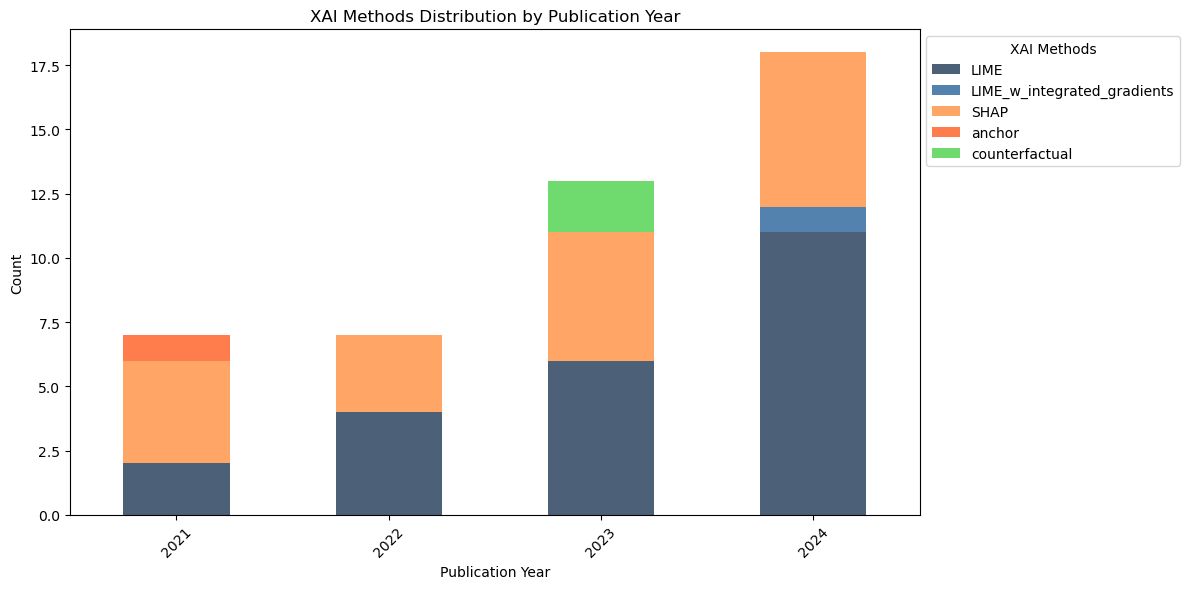

In [22]:

# Flatten XAI column and associate with publication years
exploded_df = biblio_df.explode('XAI')  # Ensure one XAI tag per row

tag_counts_by_year = exploded_df.groupby(['Publication Year', 'XAI']).size().unstack(fill_value=0)


# Step 2: Filter specific XAI methods
filtered_tag_counts_by_year = tag_counts_by_year[tag_counts_by_year.index.get_level_values('Publication Year') < 2025]

# Step 3: Define colors for each XAI method
cls = [
    '#001D3D',  
    '#0A4D8C',  
    '#FF7F24',  
    '#FF4500',  
    '#32CD32',  
    '#800080'   
]

# Step 4: Plot bar graph for XAI methods
plt.figure(figsize=(12, 6))
filtered_tag_counts_by_year.plot(kind='bar', stacked=True, color=cls, figsize=(12, 6), alpha=0.7)

# Customize the plot
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.title('XAI Methods Distribution by Publication Year')
plt.legend(title='XAI Methods', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.grid(False)
plt.xticks(ticks=range(len(filtered_tag_counts_by_year.index)), 
           labels=filtered_tag_counts_by_year.index, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## ML Methods Distribution by Publication Year

<Figure size 1200x600 with 0 Axes>

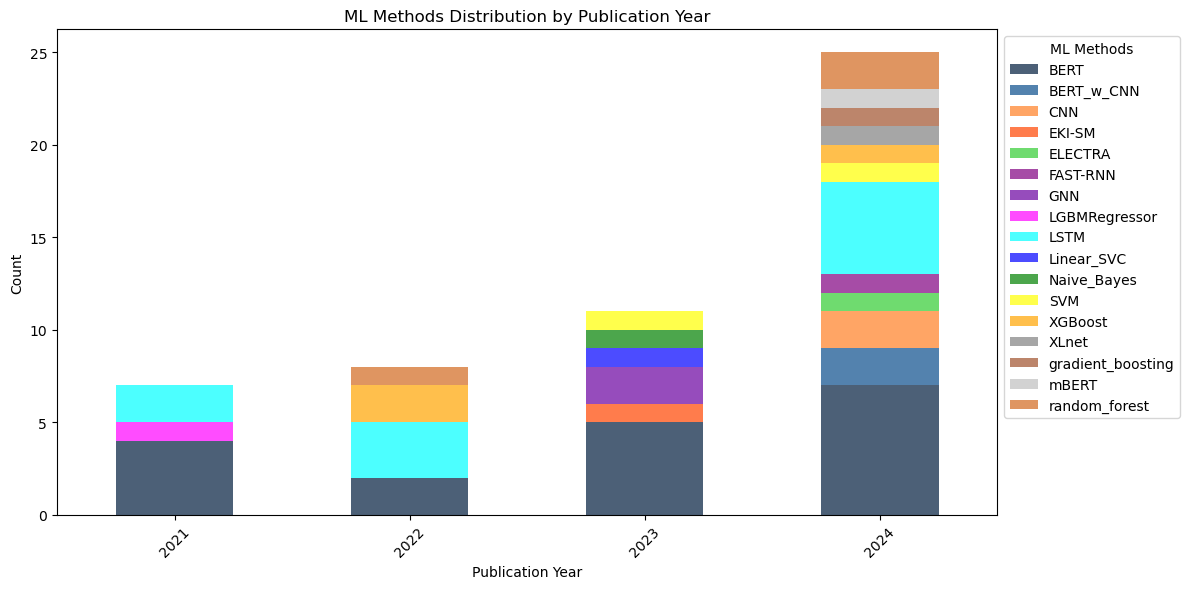

In [23]:
exploded_df = biblio_df.explode('ML Method') 

tag_counts_by_year = exploded_df.groupby(['Publication Year', 'ML Method']).size().unstack(fill_value=0)


# Step 2: Filter specific ML methods
filtered_tag_counts_by_year = tag_counts_by_year[tag_counts_by_year.index.get_level_values('Publication Year') < 2025]

# Step 3: Define colors for each ML method
cls = [
    "#001D3D", 
    "#0A4D8C", 
    "#FF7F24", 
    "#FF4500", 
    "#32CD32", 
    "#800080", 
    "#6A00A0", 
    "#FF00FF", 
    "#00FFFF", 
    "#0000FF", 
    "#008000", 
    "#FFFF00", 
    "#FFA500", 
    "#808080", 
    "#A0522D", 
    "#C0C0C0", 
    "#D2691E"   
]

# Step 4: Plot bar graph for ML methods
plt.figure(figsize=(12, 6))
filtered_tag_counts_by_year.plot(kind='bar', stacked=True, color=cls, figsize=(12, 6), alpha=0.7)

# Customize the plot
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.title('ML Methods Distribution by Publication Year')
plt.legend(title='ML Methods', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.grid(False)
plt.xticks(ticks=range(len(filtered_tag_counts_by_year.index)), 
           labels=filtered_tag_counts_by_year.index, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Detrimental Distribution by Publication Year

<Figure size 1200x600 with 0 Axes>

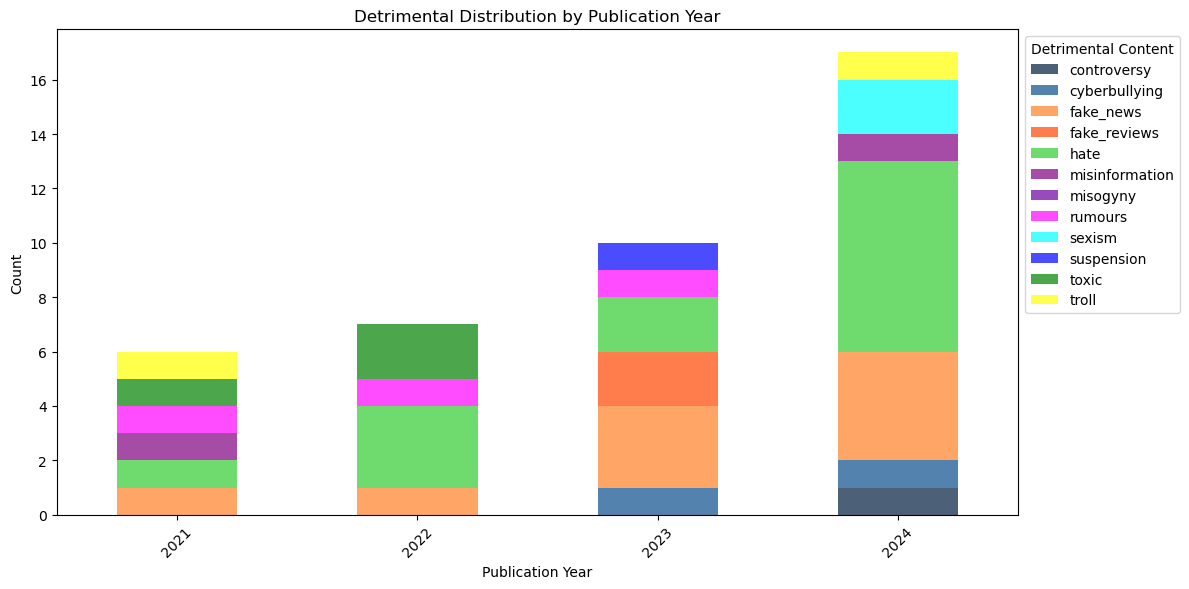

In [24]:
exploded_df = biblio_df.explode('Detrimental Content') 

tag_counts_by_year = exploded_df.groupby(['Publication Year', 'Detrimental Content']).size().unstack(fill_value=0)


# Step 2: Filter specific Detrimental Content
filtered_tag_counts_by_year = tag_counts_by_year[tag_counts_by_year.index.get_level_values('Publication Year') < 2025]

# Step 3: Define colors for each Detrimental Content
cls = [
    '#001D3D', '#0A4D8C', '#FF7F24', '#FF4500', '#32CD32', '#800080', 
 '#6A00A0', '#FF00FF', '#00FFFF', '#0000FF', '#008000', '#FFFF00', '#FFA500'
]

# Step 4: Plot bar graph for Detrimental Content
plt.figure(figsize=(12, 6))
filtered_tag_counts_by_year.plot(kind='bar', stacked=True, color=cls, figsize=(12, 6), alpha=0.7)

# Customize the plot
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.title('Detrimental Distribution by Publication Year')
plt.legend(title='Detrimental Content', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.grid(False)
plt.xticks(ticks=range(len(filtered_tag_counts_by_year.index)), 
           labels=filtered_tag_counts_by_year.index, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()